## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**.
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # importar librerías


In [ ]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')
  #completa el código

In [ ]:
traffic.head()  # mostrar las primeras 5 filas de traffic

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
eco.head() # mostrar las primeras 5 filas de eco

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [ ]:
traffic.info() # Examinar la estructura de traffic
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


In [ ]:
traffic['UpdateTimeUTC'] = pd.to_datetime(traffic['UpdateTimeUTC'])
traffic['UpdateTimeUTCWeekAgo'] = pd.to_datetime(traffic['UpdateTimeUTCWeekAgo'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Country                         1004464 non-null  object        
 1   City                            1004464 non-null  object        
 2   UpdateTimeUTC                   1004464 non-null  datetime64[ns]
 3   JamsDelay                       1004464 non-null  float64       
 4   TrafficIndexLive                1004464 non-null  float64       
 5   JamsLengthInKms                 1004464 non-null  float64       
 6   JamsCount                       1004464 non-null  float64       
 7   TrafficIndexWeekAgo             1004464 non-null  float64       
 8   UpdateTimeUTCWeekAgo            1004464 non-null  datetime64[ns]
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64       
 10  TravelTimeHistoricPer10KmsMins  1004464 no


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo ...
- ...


In [ ]:
eco.info() # Examinar la estructura de eco
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, ...
- ...

In [ ]:
eco['City GDP/capita'] = (
    eco['City GDP/capita']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

eco['Unemployment %'] = (
    eco['Unemployment %']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)

eco['PM2.5 (μg/m³)'] = (
    eco['PM2.5 (μg/m³)']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

eco['Population (M)'] = (
    eco['Population (M)']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

eco['Year'] = eco['Year'].astype(int)

eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             30 non-null     int64  
 1   City             30 non-null     object 
 2   Country          30 non-null     object 
 3   City GDP/capita  30 non-null     float64
 4   Unemployment %   30 non-null     float64
 5   PM2.5 (μg/m³)    30 non-null     float64
 6   Population (M)   30 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ KB


### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [ ]:
print(traffic.columns.tolist())

['Country', 'City', 'UpdateTimeUTC', 'JamsDelay', 'TrafficIndexLive', 'JamsLengthInKms', 'JamsCount', 'TrafficIndexWeekAgo', 'UpdateTimeUTCWeekAgo', 'TravelTimeLivePer10KmsMins', 'TravelTimeHistoricPer10KmsMins', 'MinsDelay']


In [ ]:

# Estandarizar los nombres de las columnas de traffic
#tu código aquí

traffic.columns = (
    traffic.columns
    .str.replace('(.)([A-Z][a-z]+)', r'\1_\2', regex=True)
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.lower()
)

# verificar cambios
traffic.columns


Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per10_kms_mins',
       'travel_time_historic_per10_kms_mins', 'mins_delay'],
      dtype='object')

In [ ]:
print(eco.columns.tolist())

['Year', 'City', 'Country', 'City GDP/capita', 'Unemployment %', 'PM2.5 (μg/m³)', 'Population (M)']


In [ ]:
# Estandarizar los nombres de las columnas de eco
#tu código aquí
import re
import unicodedata

def to_snake_case(text):
    text = unicodedata.normalize("NFKD", text)
    text = text.encode("ascii", "ignore").decode("ascii")
    text = text.lower()
    text = text.replace("%", "pct")
    text = re.sub(r"[^\w\s]", "_", text)
    text = re.sub(r"\s+", "_", text)
    text = re.sub(r"_+", "_", text)
    return text.strip("_")
eco.columns = [to_snake_case(col) for col in eco.columns]

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm2_5_g_m3', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [ ]:
print(traffic.columns.tolist())

['country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'traffic_index_week_ago', 'update_time_utc_week_ago', 'travel_time_live_per10_kms_mins', 'travel_time_historic_per10_kms_mins', 'mins_delay']


In [ ]:

# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()

traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce')
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'], errors='coerce')

# Verificar el cambio
traffic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   country                              1004464 non-null  object        
 1   city                                 1004464 non-null  object        
 2   update_time_utc                      1004464 non-null  datetime64[ns]
 3   jams_delay                           1004464 non-null  float64       
 4   traffic_index_live                   1004464 non-null  float64       
 5   jams_length_in_kms                   1004464 non-null  float64       
 6   jams_count                           1004464 non-null  float64       
 7   traffic_index_week_ago               1004464 non-null  float64       
 8   update_time_utc_week_ago             1004464 non-null  datetime64[ns]
 9   travel_time_live_per10_kms_mins      1004464 non-null  fl

In [ ]:
print(eco.columns.tolist())


['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct', 'pm2_5_g_m3', 'population_m']


In [ ]:

# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('.', '').str.replace(',', '.').str.replace('%', '').astype(float)
eco['population_m'] = eco['population_m'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m'] * 1000000

# verificar el cambio
eco.info()
eco.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm2_5_g_m3        30 non-null     float64
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm2_5_g_m3,population_m,population
0,2023,buenos-aires,Argentina,157820.0,62.0,15.2,153.0,153000000.0
1,2023,sao-paulo,Brazil,144750.0,91.0,29.5,225.0,225000000.0
2,2023,rio-de-janeiro,Brazil,131420.0,98.0,19.1,136.0,136000000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [ ]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year


# Verificar
traffic[['update_time_utc','year']].head(3)

,update_time_utc,year
0,2025-01-13 04:01:30.001,2025
1,2025-01-13 03:46:00.000,2025
2,2025-01-13 02:46:30.000,2025


In [ ]:

# Filtra los registros del año 2024
# traffic_2024 = traffic[...].copy()
traffic_2024 = traffic[traffic['year'] == 2024].copy()
# eco_2024 = ...
eco_2024 = eco[eco['year'] == 2024].copy()

print("Traffic 2024 shape:", traffic_2024.shape)
print("Eco 2024 shape:", eco_2024.shape)

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())



Traffic 2024 shape: (886779, 13)
Eco 2024 shape: (15, 8)


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm2_5_g_m3,population_m,population
15,2024,buenos-aires,Argentina,181170.0,72.0,14.5,154.0,154000000.0
16,2024,sao-paulo,Brazil,147030.0,85.0,28.0,226.0,226000000.0
17,2024,rio-de-janeiro,Brazil,133490.0,92.0,18.4,137.0,137000000.0
18,2024,brasilia,Brazil,162510.0,78.0,12.8,48.0,48000000.0
19,2024,salvador,Brazil,88990.0,124.0,15.2,39.0,39000000.0


In [ ]:
traffic_2024[['year', 'update_time_utc']].head()
eco_2024['year'].value_counts()

2024    15
Name: year, dtype: int64


---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [ ]:
print(traffic_2024.columns.tolist())


['country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'jams_count', 'traffic_index_week_ago', 'update_time_utc_week_ago', 'travel_time_live_per10_kms_mins', 'travel_time_historic_per10_kms_mins', 'mins_delay', 'year']


In [ ]:


# Calcular los  promedios de trafico por ciudad, país y año
# tu código aqui

traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'year']).agg({
    'jams_delay': 'mean',
    'traffic_index_live': 'mean',
    'jams_length_in_kms': 'mean',
    'jams_count': 'mean',
    'mins_delay': 'mean',
    'travel_time_live_per10_kms_mins': 'mean',
    'travel_time_historic_per10_kms_mins': 'mean'
}).reset_index()

# Mostrar resultado
traffic_city_year_2024.head()


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

La ciudad con el mayor tiempo promedio de tráfico es ...

In [ ]:
# tu código aquí
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False).head(1)


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.21819,389.239265,594.969392,1.855542,21.809092,19.95355



---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [ ]:

# Seleccionar columnas clave de tráfico y economía
traffic_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per10_kms_mins','travel_time_historic_per10_kms_mins']

eco_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_subset = traffic_city_year_2024[traffic_cols].copy()

# eco_2024_small = ...
economy_subset = eco_2024[['city', 'year', 'city_gdp_capita', 'unemployment_pct', 'population']].copy()


# Unir datasets
merged = traffic_subset.merge(
    economy_subset,
    on=['city', 'year'],
    how='inner'

)

# Mostrar las primeras 5 filas
print("Dataset combinado (primeras 5 filas):")
display(merged.head())

print(f"\nDimensiones del dataset combinado: {merged.shape}")


Dataset combinado (primeras 5 filas):


,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per10_kms_mins,travel_time_historic_per10_kms_mins,city_gdp_capita,unemployment_pct,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,111240.0,95.0,61000000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,114420.0,100.0,113000000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,162510.0,78.0,48000000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,181170.0,72.0,154000000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,123810.0,82.0,37000000.0



Dimensiones del dataset combinado: (15, 13)



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

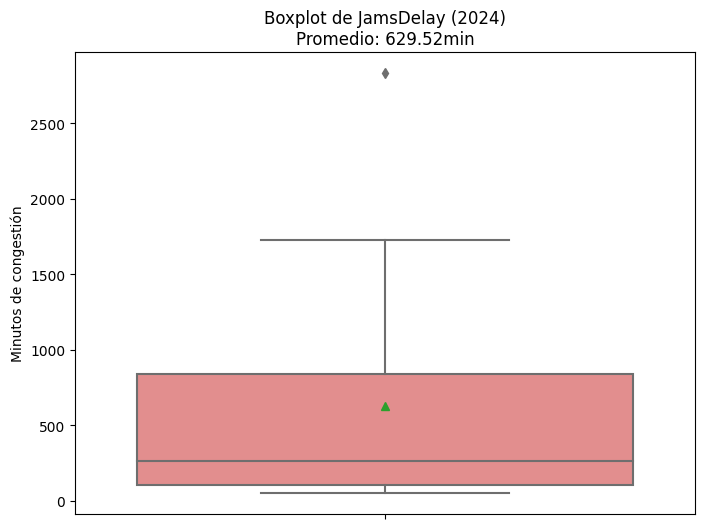

In [ ]:

# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged, y='jams_delay', showmeans=True, color='lightcoral')

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}min')
plt.ylabel('Minutos de congestión')
plt.show()



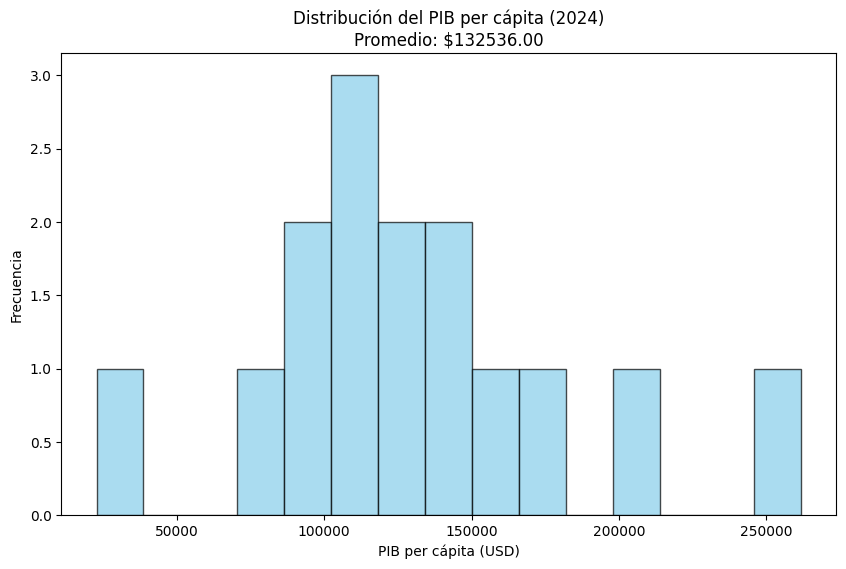

In [ ]:

# Crear histograma para ver la distribución de la economía (city_gdp_capita)
plt.figure(figsize=(10, 6))
plt.hist(merged['city_gdp_capita'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')

mean_gdp = merged['city_gdp_capita'].mean()
plt.title(f'Distribución del PIB per cápita (2024)\nPromedio: ${mean_gdp:.2f}')
plt.xlabel('PIB per cápita (USD)')
plt.ylabel('Frecuencia')
plt.show()


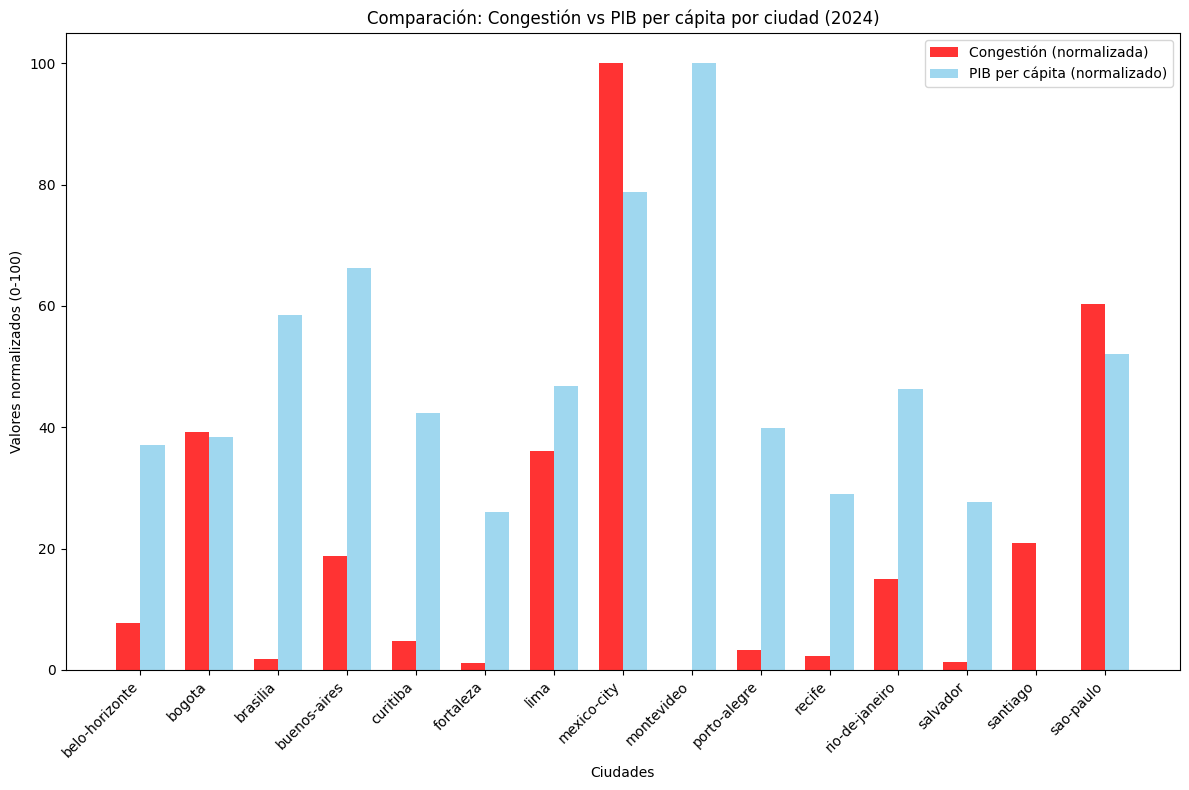

In [ ]:

# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])
city_comparison = merged.groupby('city').agg({
    'jams_delay': 'mean',
    'city_gdp_capita': 'mean'
}).reset_index()

# Normalizar los datos para hacerlos comparables (escala 0-100)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))

city_comparison['jams_delay_norm'] = scaler.fit_transform(city_comparison[['jams_delay']])
city_comparison['gdp_norm'] = scaler.fit_transform(city_comparison[['city_gdp_capita']])



fig, ax = plt.subplots(figsize=(12, 8))
x = range(len(city_comparison))
width = 0.35

#Barras
bars1 = ax.bar([i - width/2 for i in x], city_comparison['jams_delay_norm'],
               width, label='Congestión (normalizada)', alpha=0.8, color='red')
bars2 = ax.bar([i + width/2 for i in x], city_comparison['gdp_norm'],
               width, label='PIB per cápita (normalizado)', alpha=0.8, color='skyblue')

#Etiquetas y titulos
ax.set_xlabel('Ciudades')
ax.set_ylabel('Valores normalizados (0-100)')
ax.set_title('Comparación: Congestión vs PIB per cápita por ciudad (2024)')
ax.set_xticks(x)
ax.set_xticklabels(city_comparison['city'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios:

*Al observar el grafico de barras normalizado, algunas ciudades con alto PIB per capita también demuestran congestión elevada,  lo que sugiere que el crecimiento económico y la urbanización intensa puede aumentar el tráfico.
*Sin embargo, no todas las ciudades ricas presentan la mayor congestión. Esto indica que otros factores, como infraestructura vial, transporte público o planificación urbana, también influyen.
*No se observa una correlación lineal perfecta entre PIB y congestión, pero sí existe una tendencia: mayor actividad económica suele asociarse a más congestión, aunque con excepciones.



---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)


Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información.


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).
